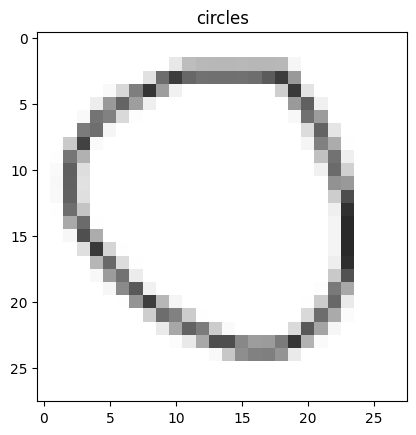

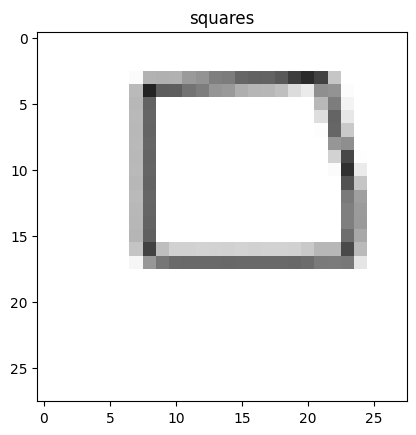

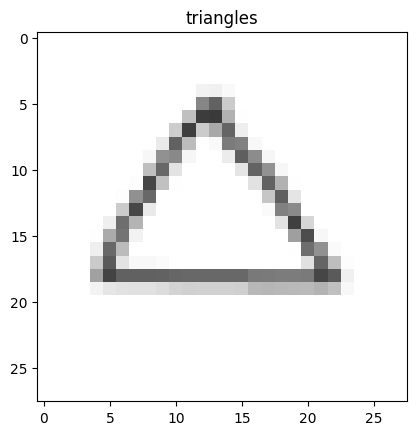

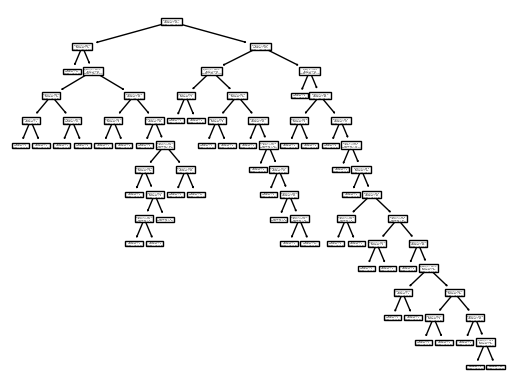

Točnost: 0.4777777777777778
Utežena F1 vrednost: 0.48194444444444445
Utežena preciznost: 0.5048839269891902
Utežen priklic: 0.4777777777777778
Točnost knn: 0.4888888888888889
Utežena knn F1 vrednost: 0.468919431458847
Utežena knn preciznost: 0.6520325203252032
Utežen knn priklic: 0.4888888888888889


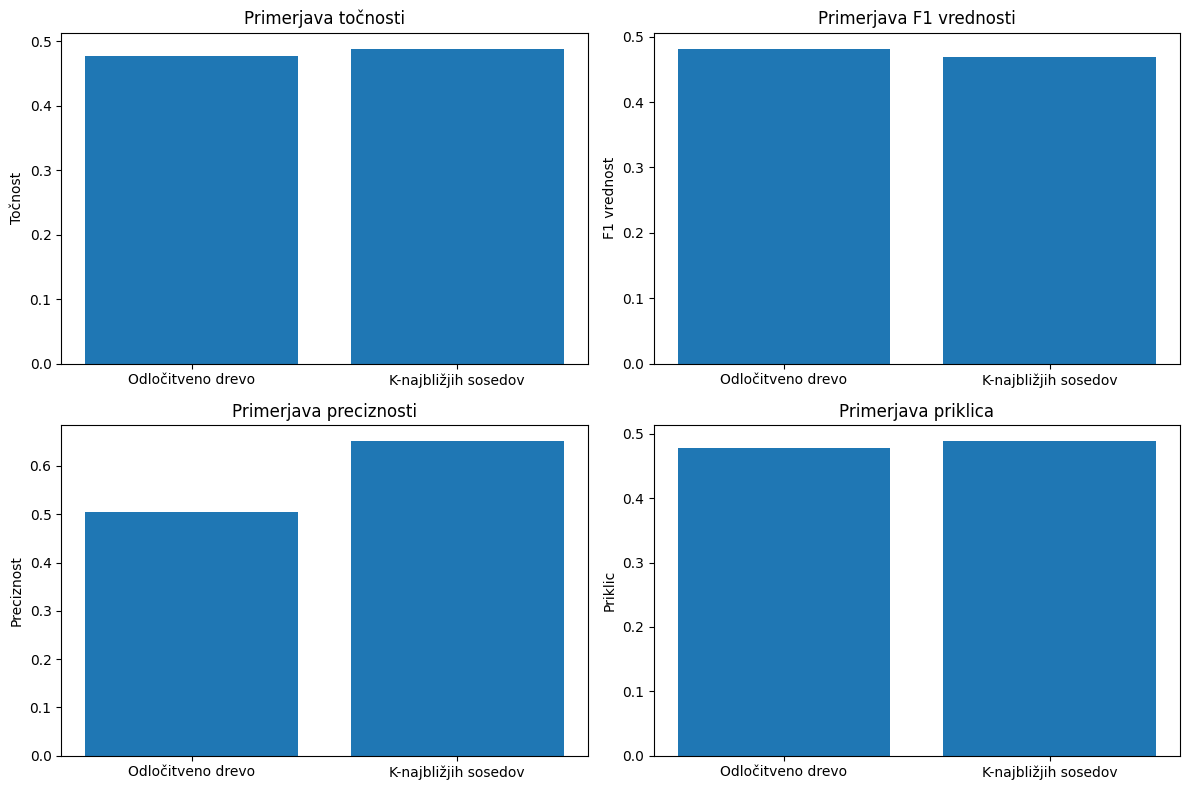

In [3]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Izgradnja seznama poti do slik podatkovne množice
data_dir = 'C:/Users/mitja/Desktop/shapes'
categories = ['circles', 'squares', 'triangles']
paths = []
labels = []

for i, category in enumerate(categories):
    category_dir = os.path.join(data_dir, category)
    for filename in os.listdir(category_dir):
        paths.append(os.path.join(category_dir, filename))
        labels.append(i)

# Izris primerka slike posamezne kategorije
for i, category in enumerate(categories):
    img_path = paths[labels.index(i)]
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(category)
    plt.show()

# Izgradnja dvodimenzionalnega polja slik
images = []
for path in paths:
    img = Image.open(path).convert('L')
    img_array = np.array(img).flatten()
    images.append(img_array)

X = np.array(images)
y = np.array(labels)

# Razdelitev v množice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4321, shuffle=True)

# Gradnja napovednega modela
clf = DecisionTreeClassifier(random_state=1234)
clf.fit(X_train, y_train)

# Izris odločitvenega drevesa
plot_tree(clf)
plt.show()

#Ovrednotenje 
y_pred = clf.predict(X_test)
print(f'Točnost: {accuracy_score(y_test, y_pred)}')
print(f'Utežena F1 vrednost: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Utežena preciznost: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Utežen priklic: {recall_score(y_test, y_pred, average="weighted")}')


# Gradnja modela z algoritmom k-najbližjih sosedov
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Ovrednotenje napovednega modela
y_pred_knn = knn.predict(X_test)

print(f'Točnost knn: {accuracy_score(y_test, y_pred_knn)}')
print(f'Utežena knn F1 vrednost: {f1_score(y_test, y_pred_knn, average="weighted")}')
print(f'Utežena knn preciznost: {precision_score(y_test, y_pred_knn, average="weighted")}')
print(f'Utežen knn priklic: {recall_score(y_test, y_pred_knn, average="weighted")}')

# Primerjava rezultatov obeh algoritmov v obliki grafov
plt.figure(figsize=(12, 8))

# Izračun metrik za grafe
accuracy_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred, average="weighted")
precision_dt = precision_score(y_test, y_pred, average="weighted")
recall_dt = recall_score(y_test, y_pred, average="weighted")

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")
precision_knn = precision_score(y_test, y_pred_knn, average="weighted")
recall_knn = recall_score(y_test, y_pred_knn, average="weighted")
# Primerjava točnosti
plt.subplot(2, 2, 1)
plt.bar(['Odločitveno drevo', 'K-najbližjih sosedov'], [accuracy_dt, accuracy_knn])
plt.title('Primerjava točnosti')
plt.ylabel('Točnost')

# Primerjava F1 vrednosti
plt.subplot(2, 2, 2)
plt.bar(['Odločitveno drevo', 'K-najbližjih sosedov'], [f1_dt, f1_knn])
plt.title('Primerjava F1 vrednosti')
plt.ylabel('F1 vrednost')

# Primerjava preciznosti
plt.subplot(2, 2, 3)
plt.bar(['Odločitveno drevo', 'K-najbližjih sosedov'], [precision_dt, precision_knn])
plt.title('Primerjava preciznosti')
plt.ylabel('Preciznost')

# Primerjava priklica
plt.subplot(2, 2, 4)
plt.bar(['Odločitveno drevo', 'K-najbližjih sosedov'], [recall_dt, recall_knn])
plt.title('Primerjava priklica')
plt.ylabel('Priklic')

plt.tight_layout()
plt.show()